# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
#Import the datasets
Fcheck = pd.read_csv("Fraud_check.csv")

In [3]:
Fcheck.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
Fcheck.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


# EDA

In [5]:
# Renaming Columns
Fcheck = Fcheck.rename({'Taxable.Income':'tax_income', 'City.Population':'population', 'Work.Experience' : 'work_exp',
                       'Marital.Status' : 'marital_status'} ,axis=1)
Fcheck

,Undergrad,marital_status,tax_income,population,work_exp,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [6]:
Fcheck = pd.get_dummies(Fcheck,prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False
                         , drop_first=False, dtype= None)
Fcheck

,tax_income,population,work_exp,Undergrad_NO,Undergrad_YES,marital_status_Divorced,marital_status_Married,marital_status_Single,Urban_NO,Urban_YES
0,68833,50047,10,1,0,0,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1
2,36925,160205,30,1,0,0,1,0,0,1
3,50190,193264,15,0,1,0,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1
596,69967,55369,2,0,1,1,0,0,0,1
597,47334,154058,0,1,0,1,0,0,0,1
598,98592,180083,17,0,1,0,1,0,1,0


In [7]:
# converting numerical values to caterical
# treating those who have taxable_income <= 30000 as "Risky" and others are "Good"
Fcheck['tax_income'] = np.where(Fcheck.tax_income <= 30000, 0 , 1)

In [8]:
Fcheck

,tax_income,population,work_exp,Undergrad_NO,Undergrad_YES,marital_status_Divorced,marital_status_Married,marital_status_Single,Urban_NO,Urban_YES
0,1,50047,10,1,0,0,0,1,0,1
1,1,134075,18,0,1,1,0,0,0,1
2,1,160205,30,1,0,0,1,0,0,1
3,1,193264,15,0,1,0,0,1,0,1
4,1,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,1,39492,7,0,1,1,0,0,0,1
596,1,55369,2,0,1,1,0,0,0,1
597,1,154058,0,1,0,1,0,0,0,1
598,1,180083,17,0,1,0,1,0,1,0


# Transforming the data into two sets x and y

In [9]:
x = Fcheck.iloc[:,1:10]
y = Fcheck['tax_income']

In [10]:
x

,population,work_exp,Undergrad_NO,Undergrad_YES,marital_status_Divorced,marital_status_Married,marital_status_Single,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,0,1
596,55369,2,0,1,1,0,0,0,1
597,154058,0,1,0,1,0,0,0,1
598,180083,17,0,1,0,1,0,1,0


In [11]:
y

0      1
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: tax_income, Length: 600, dtype: int32

In [12]:
# Finding the Unique values and count from target variable

In [13]:
Fcheck['tax_income'].unique()

array([1, 0])

In [14]:
Fcheck.tax_income.value_counts()

1    476
0    124
Name: tax_income, dtype: int64

In [15]:
#Finding the column names
colnames = list(Fcheck.columns)
colnames

['tax_income',
 'population',
 'work_exp',
 'Undergrad_NO',
 'Undergrad_YES',
 'marital_status_Divorced',
 'marital_status_Married',
 'marital_status_Single',
 'Urban_NO',
 'Urban_YES']

Splitting the data into training and testing data sets

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2 , random_state = 30)

# Building Decision Tree Classifier using Entropy Criteria

In [17]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

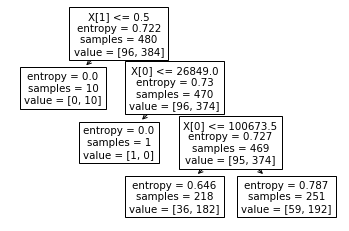

In [18]:
#PLot the decision tree
tree.plot_tree(model);

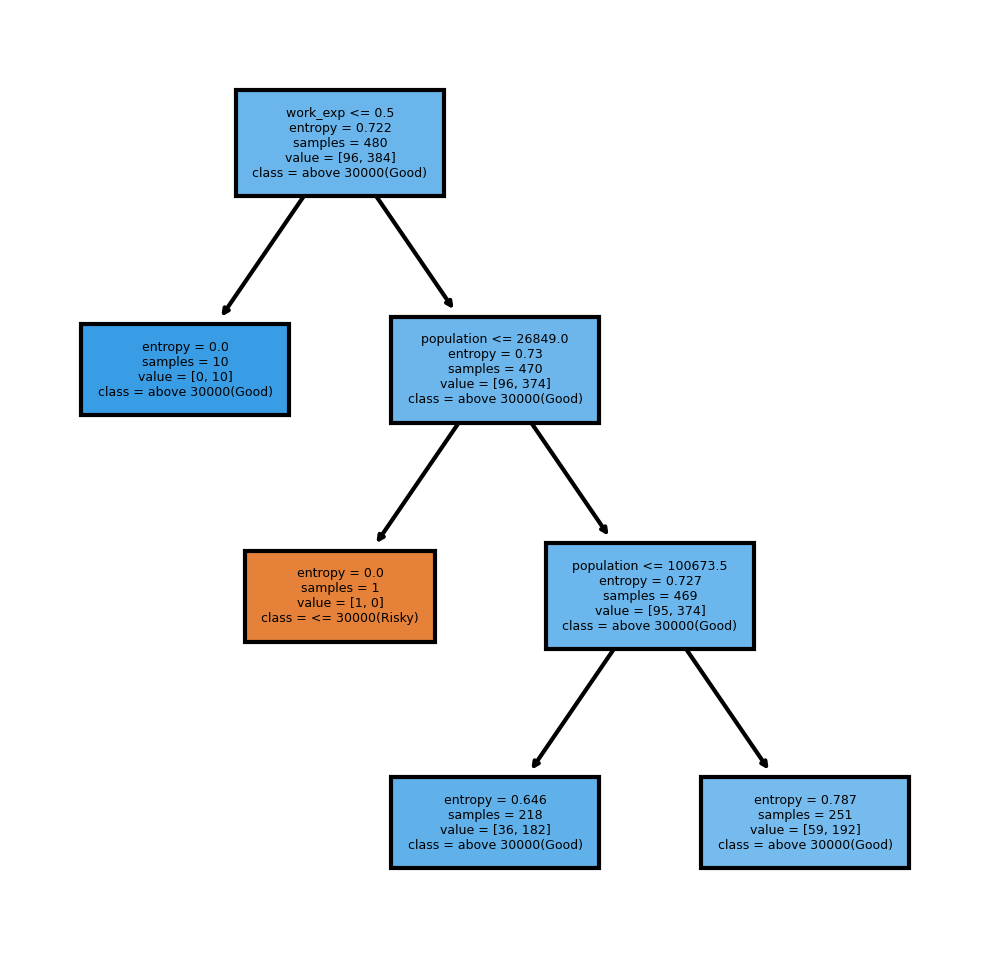

In [19]:
fn=['population' , 'work_exp' ,'Undergrad_NO', 'Undergrad_YES', 'marital_status_Divorced', 'marital_status_Married',
 'marital_status_Single', 'Urban_NO', 'Urban_YES']
cn=['<= 30000(Risky)', 'above 30000(Good)']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True,fontsize =3);

In [20]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

1    119
0      1
dtype: int64

In [21]:
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [22]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
tax_income,,
0,0,28
1,1,91


In [23]:
# Accuracy 
np.mean(preds==y_test)

0.7583333333333333

# Building Decision Tree Classifier (CART) using Gini Criteria

In [24]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [25]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [26]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.7583333333333333